In [33]:
import os
import sys
import logging

import pandas as pd
import numpy as np

import matplotlib as mp
from matplotlib import pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker



In [3]:
#----------------------------------------------------------------
# Configurations section
#----------------------------------------------------------------

data_file_path = os.path.join("..","data")
csv_data_file = os.path.join(data_file_path, "report_data.csv")


In [2]:
#----------------------------------------------------------------
# Import the procedures that download and transform the pdf file
# into a dataframe.
#----------------------------------------------------------------

module_path = os.path.abspath(os.path.join('..','src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from ETL import load_data_file
from ETL import init_logger

from ChartTools import remove_tick_lines
from ChartTools import every_nth_tick
from ChartTools import autolabel
from ChartTools import set_axes_common_properties
from ChartTools import text_box

init_logger('/tmp', "etl-notebook.log",log_level=logging.DEBUG, std_out_log_level=logging.ERROR)



/home/giovanni/code-personal/python/CoronaVirus/src


In [8]:
print(csv_data_file)
df = load_data_file(csv_data_file)
if df.is_ok():
    df = df()
(df.shape, df["REPORT DATE"].min(), df["REPORT DATE"].max(),df.dtypes)


../data/report_data.csv


((5229, 12),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2021-01-04 00:00:00'),
 REPORT DATE                    datetime64[ns]
 Regione                                object
 Ricoverati con sintomi                  int64
 Terapia intensiva                       int64
 Totale attualmente positivi             int64
 DECEDUTI                                int64
 Isolamento domiciliare                  int64
 CASI TOTALI - A                         int64
 Totale tamponi effettuati             float64
 SCHEMA VERSION                         object
 D - CASI TOTALI - A                   float64
 D - DECEDUTI                          float64
 dtype: object)

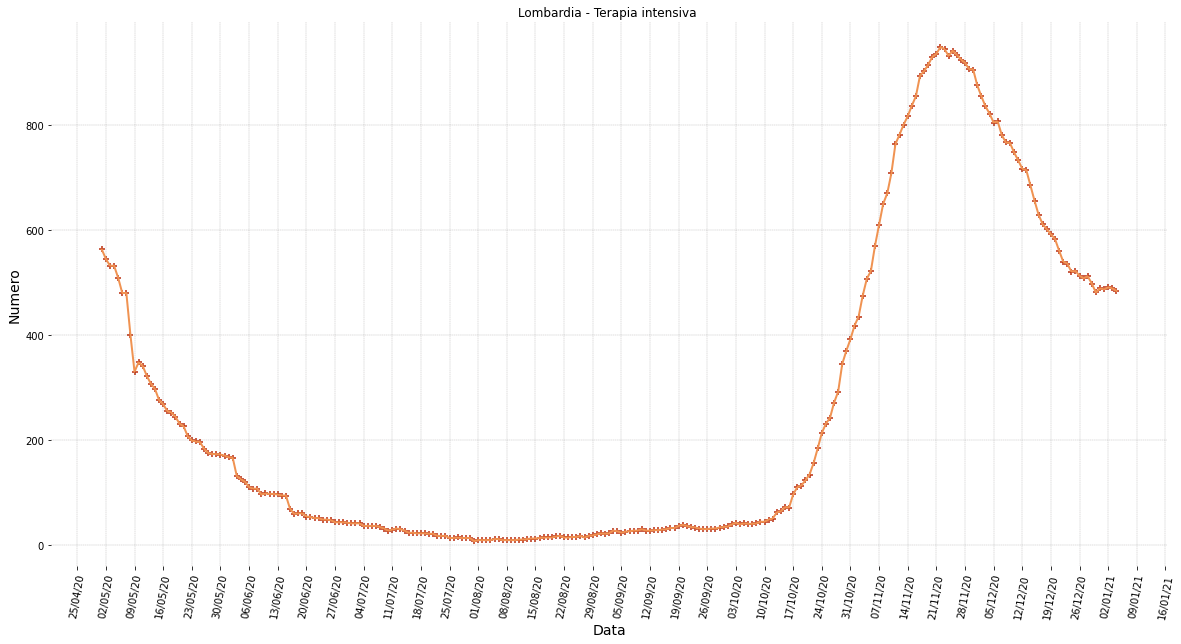

In [50]:
#-------------------------------------------------
# Get data.
#-------------------------------------------------
region_name = 'Lombardia'
mask = df['Regione'] == region_name
region_df = df.loc[mask,:]
region_df = region_df.sort_values(["REPORT DATE"])
x = region_df["REPORT DATE"] 
y = region_df["Terapia intensiva"]

#-------------------------------------------------
# Chart configuration and build.
#-------------------------------------------------
fig = plt.figure(figsize=(20, 10))
gs1 = gridspec.GridSpec(1, 1
                       ,hspace=0.2
                       ,wspace=0.1 
                       ,figure=fig)

ax = []
ax.append(fig.add_subplot(gs1[0,0]))
idx = 0
set_axes_common_properties(ax[0], no_grid=False)

ax[idx].set_xticks(x)
ax[idx].set_xticklabels(x, rotation=80)

ax[idx].xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y"))
ax[idx].xaxis.set_minor_formatter(mdates.DateFormatter("%d/%m"))
ax[idx].xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax[idx].set_ylabel("Numero", fontsize=14)
ax[idx].set_xlabel("Data", fontsize=14)
ax[idx].set_title("{reg} - {title} ".format(title="Terapia intensiva", reg=region_name, fontsize=18))

ax[idx].scatter(x, y, color="#b9290a", s=30, marker='+', label="Etichetta")
ax[idx].plot(x, y, 'b-', linewidth=2, color="#f09352")
            
    